# League of Legends Match Predictor 


In [6]:
!pip install pandas
!pip install scikit-learn
!pip install torch
!pip install matplotlib
!pip install pandas


You should consider upgrading via the '/Users/renada/.pyenv/versions/3.8.10/bin/python3.8 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/renada/.pyenv/versions/3.8.10/bin/python3.8 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/renada/.pyenv/versions/3.8.10/bin/python3.8 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/renada/.pyenv/versions/3.8.10/bin/python3.8 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/renada/.pyenv/versions/3.8.10/bin/python3.8 -m pip install --upgrade pip' command.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
path = 'https://raw.githubusercontent.com/learn-co-students/nyc-ds-033020-lectures/master/Mod_4/NN/league_of_legends_data_large.csv'
data = pd.read_csv(path)
X = data.drop('win', axis=1)
y = data['win']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)
print("Data loading, splitting, and standardization complete.")

X_train_tensor shape: torch.Size([800, 8])
X_test_tensor shape: torch.Size([200, 8])
y_train_tensor shape: torch.Size([800, 1])
y_test_tensor shape: torch.Size([200, 1])


In [ ]:
import torch.nn as nn
import torch.optim as optim

class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)
        
    def forward(self, x):
        return torch.sigmoid(self.linear(x))

input_dim = X_train.shape[1]
model = LogisticRegressionModel(input_dim)
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

print("Model, loss function, and optimizer initialization complete.")



LogisticRegressionModel(
  (linear): Linear(in_features=8, out_features=1, bias=True)
)


In [ ]:
epochs = 1000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

model.eval()
with torch.no_grad():
    y_pred_train = model(X_train).detach()
    y_pred_test = model(X_test).detach()
    
train_accuracy = ((y_pred_train > 0.5) == y_train).float().mean()
test_accuracy = ((y_pred_test > 0.5) == y_test).float().mean()

print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

Epoch [100/1000], Loss: 0.7038
Epoch [200/1000], Loss: 0.6970
Epoch [300/1000], Loss: 0.6926
Epoch [400/1000], Loss: 0.6899
Epoch [500/1000], Loss: 0.6882
Epoch [600/1000], Loss: 0.6871
Epoch [700/1000], Loss: 0.6864
Epoch [800/1000], Loss: 0.6860
Epoch [900/1000], Loss: 0.6857
Epoch [1000/1000], Loss: 0.6855
Training Accuracy: 53.50%
Test Accuracy: 49.00%


In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=0.01)

epochs = 1000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

model.eval()
with torch.no_grad():
    y_pred_train = model(X_train).detach()
    y_pred_test = model(X_test).detach()
    
train_accuracy = ((y_pred_train > 0.5) == y_train).float().mean()
test_accuracy = ((y_pred_test > 0.5) == y_test).float().mean()

print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')



Epoch [100/1000], Loss: 0.6854
Epoch [200/1000], Loss: 0.6854
Epoch [300/1000], Loss: 0.6853
Epoch [400/1000], Loss: 0.6853
Epoch [500/1000], Loss: 0.6853
Epoch [600/1000], Loss: 0.6853
Epoch [700/1000], Loss: 0.6853
Epoch [800/1000], Loss: 0.6853
Epoch [900/1000], Loss: 0.6853
Epoch [1000/1000], Loss: 0.6853
Training Accuracy: 54.50%
Test Accuracy: 50.50%


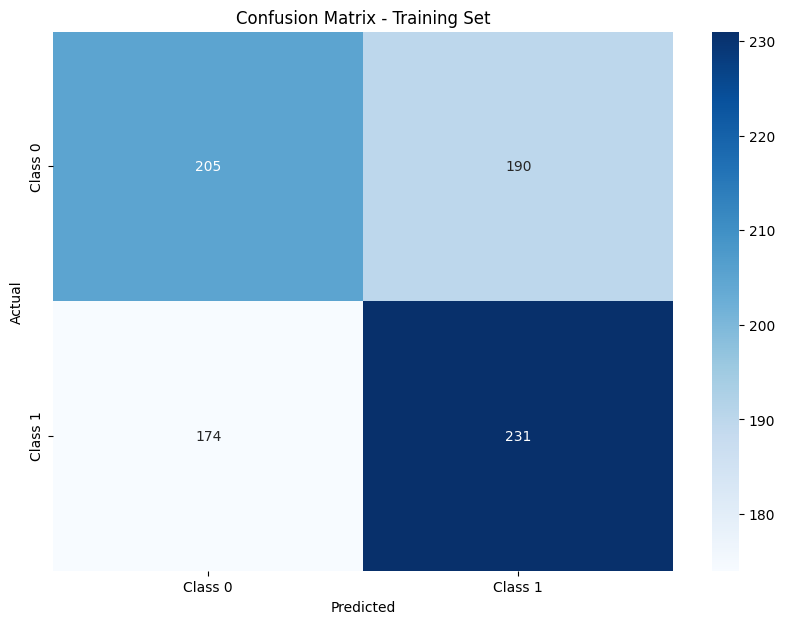

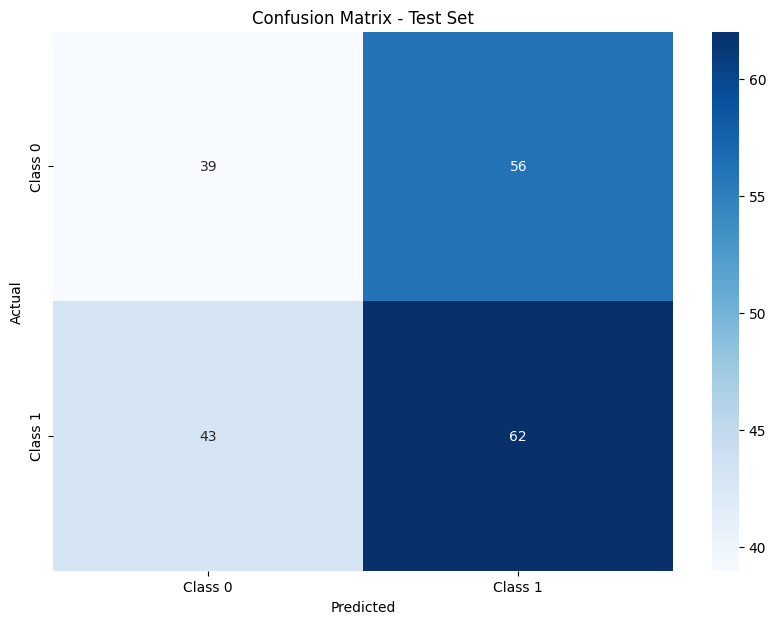

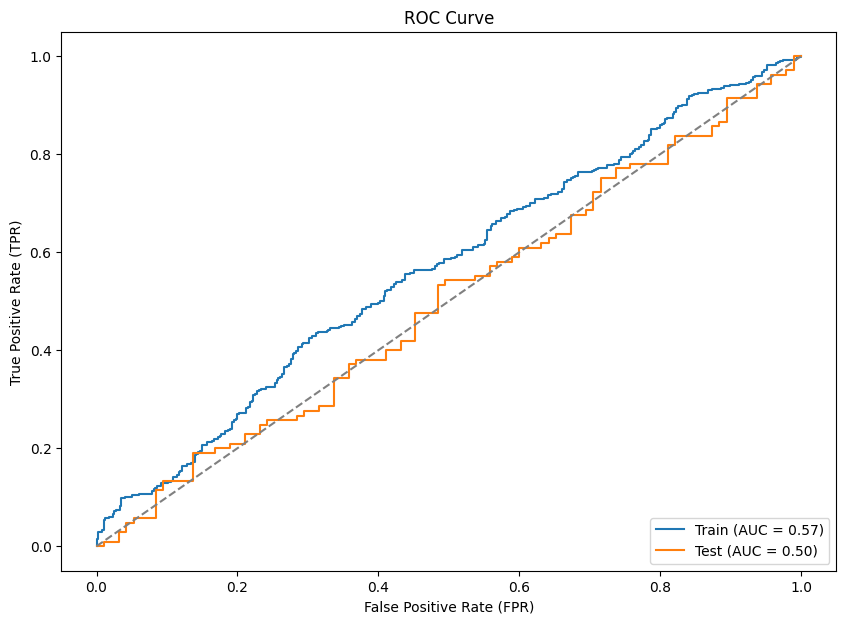

Classification Report - Training Set:
              precision    recall  f1-score   support

         0.0       0.54      0.52      0.53       395
         1.0       0.55      0.57      0.56       405

    accuracy                           0.55       800
   macro avg       0.54      0.54      0.54       800
weighted avg       0.54      0.55      0.54       800

Classification Report - Test Set:
              precision    recall  f1-score   support

         0.0       0.48      0.41      0.44        95
         1.0       0.53      0.59      0.56       105

    accuracy                           0.51       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.50      0.51      0.50       200



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import itertools

y_pred_test_labels = (y_pred_test > 0.5).float()
cm = confusion_matrix(y_test, y_pred_test_labels)

plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = range(2)
plt.xticks(tick_marks, ['Loss', 'Win'], rotation=45)
plt.yticks(tick_marks, ['Loss', 'Win'])

thresh = cm.max() / 2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print("Classification Report:\n", classification_report(y_test, y_pred_test_labels, target_names=['Loss', 'Win']))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


Double-click <b>here</b> for the Hint.
<!-- 

#Change the name of variables as per your code
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import itertools

# Visualize the confusion matrix
#Change the variable names as used in your code
y_pred_test_labels = (y_pred_test > 0.5).float()
cm = confusion_matrix(y_test, y_pred_test_labels)

plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = range(2)
plt.xticks(tick_marks, ['Loss', 'Win'], rotation=45)
plt.yticks(tick_marks, ['Loss', 'Win'])

thresh = cm.max() / 2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred_test_labels, target_names=['Loss', 'Win']))

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
-->



Test Accuracy after loading the model: 0.5050

Confusion Matrix after loading the model:
[[39 56]
 [43 62]]

Classification Report after loading the model:
              precision    recall  f1-score   support

         0.0       0.48      0.41      0.44        95
         1.0       0.53      0.59      0.56       105

    accuracy                           0.51       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.50      0.51      0.50       200



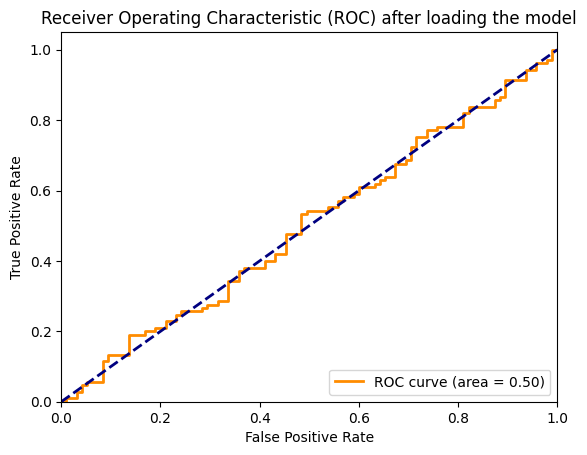

In [ ]:
torch.save(model.state_dict(), 'logistic_regression_model.pth')

loaded_model = LogisticRegressionModel(input_dim)
loaded_model.load_state_dict(torch.load('logistic_regression_model.pth'))

loaded_model.eval()

with torch.no_grad():
    y_pred_test_loaded = loaded_model(X_test).detach()
    loaded_test_accuracy = ((y_pred_test_loaded > 0.5) == y_test).float().mean()
    print(f'Loaded Model Test Accuracy: {loaded_test_accuracy:.4f}')


In [ ]:
learning_rates = [0.01, 0.05, 0.1]
best_accuracy = 0
best_lr = 0

for lr in learning_rates:
    model = LogisticRegressionModel(input_dim)
    criterion = nn.BCELoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)
    
    epochs = 1000
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        
        if (epoch+1) % 100 == 0:
            print(f'Learning Rate: {lr}, Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')
    model.eval()
    with torch.no_grad():
        y_pred_test = model(X_test).detach()
        test_accuracy = ((y_pred_test > 0.5) == y_test).float().mean()
        print(f'Learning Rate: {lr}, Test Accuracy: {test_accuracy:.4f}')
        
        if test_accuracy > best_accuracy:
            best_accuracy = test_accuracy
            best_lr = lr

print(f'Best Learning Rate: {best_lr}, Best Test Accuracy: {best_accuracy:.4f}')

Training with learning rate: 0.01
Test Accuracy with learning rate 0.01: 0.4900
Training with learning rate: 0.05
Test Accuracy with learning rate 0.05: 0.5300
Training with learning rate: 0.1
Test Accuracy with learning rate 0.1: 0.5300

Best learning rate: 0.05 with test accuracy: 0.5300


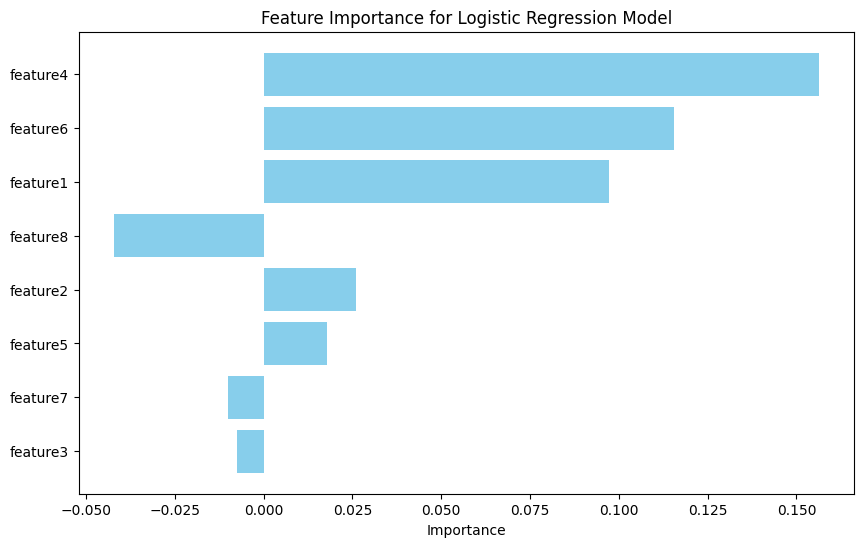

    Feature  Importance
3  feature4    0.156291
5  feature6    0.115500
0  feature1    0.097370
7  feature8   -0.042030
1  feature2    0.026068
4  feature5    0.017737
6  feature7   -0.010089
2  feature3   -0.007585


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

weights = model.linear.weight.data.numpy().flatten()
features = X.columns

feature_importance = pd.DataFrame({'Feature': features, 'Importance': weights})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print(feature_importance)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()
